In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hr_data.csv')
data = data.drop(columns=['Duration to accept offer', 'SLNO', 'Candidate Ref'])

In [ ]:
data['DOJ Extended'] = data['DOJ Extended'].map({'Yes': 1, 'No': 0})
data['Joining Bonus'] = data['Joining Bonus'].map({'Yes': 1, 'No': 0})
data['Candidate relocate actual'] = data['Candidate relocate actual'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Status'] = data['Status'].map({'Joined': 1, 'Not Joined': 0})

In [ ]:
categorical_columns = ['Offered band', 'Candidate Source', 'LOB', 'Location']
data = pd.get_dummies(data, columns=categorical_columns)

In [ ]:
X = data.drop(columns=['Status'])
y = data['Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.7909949972206781
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.11      0.17       340
           1       0.82      0.95      0.88      1459

    accuracy                           0.79      1799
   macro avg       0.58      0.53      0.53      1799
weighted avg       0.73      0.79      0.75      1799



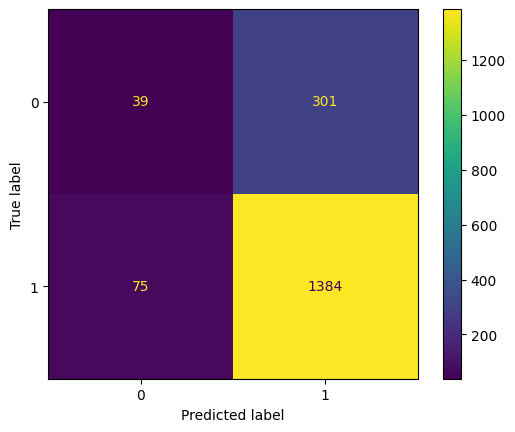

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

class_names = model.classes_

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot()
plt.show()

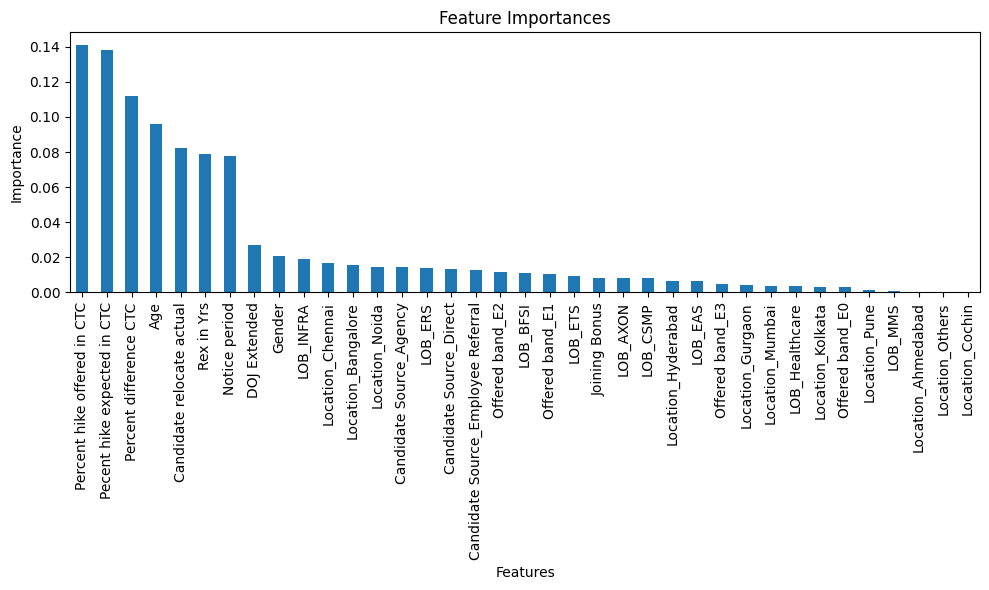

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)

feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()